In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
data=pd.read_csv(r'C:\Users\Tejes\Downloads\titanic_dataset.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [137]:
data['Age'].median()

28.0

In [138]:
data['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [139]:
data['Embarked'].mode()

0    S
dtype: object

In [140]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [141]:
data['Age']=data['Age'].fillna(data['Age'].median())
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [142]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [143]:
data["Cabin"]=data["Cabin"].str.slice(0,1)
data['Cabin']=data['Cabin'].replace(['A','B','C','D','E','F','G','T','X'],[0,1,2,3,4,5,6,7,8])
data['Sex']=data['Sex'].replace(['male','female'],[0,1])
data['Embarked']=data['Embarked'].replace(['S','C','Q'],[0,1,2])

In [144]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [145]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

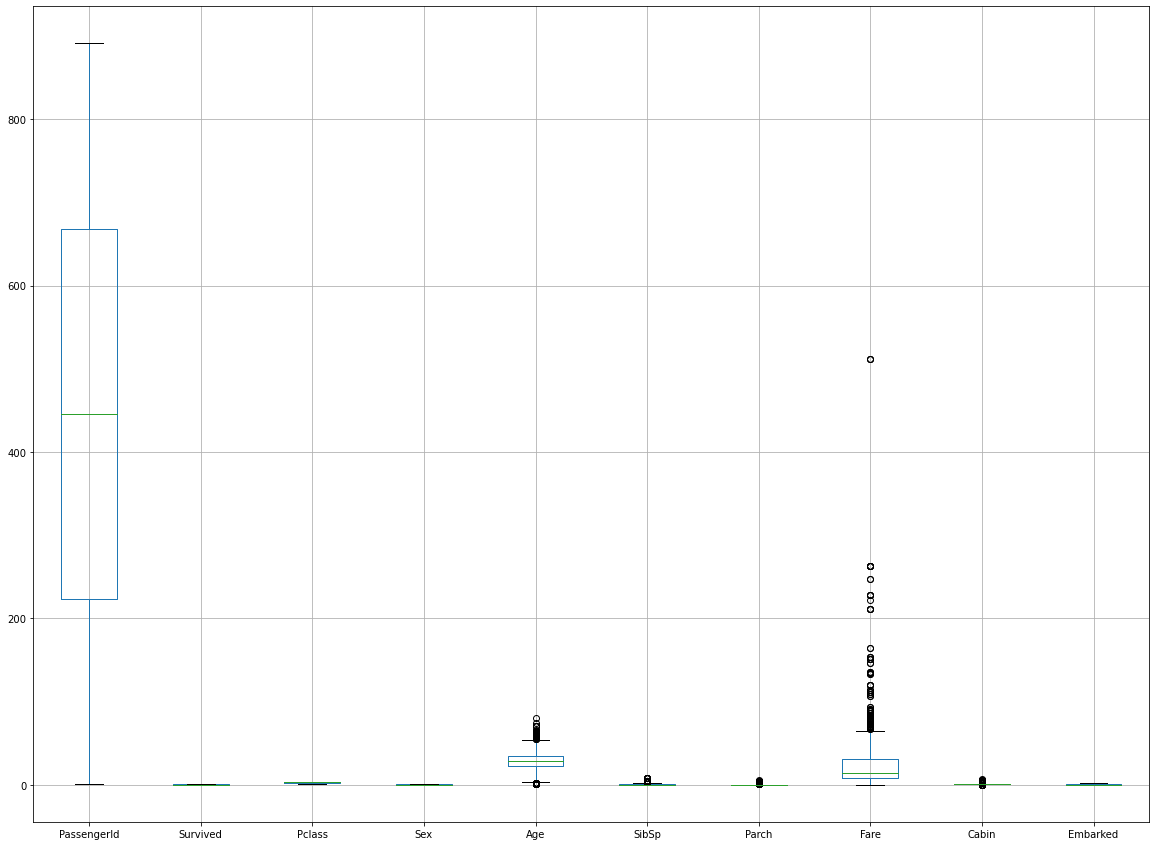

In [146]:
graph=data.select_dtypes(include=['int64','float64','int32'])
graph.boxplot(figsize=(20,15))
plt.show()

In [147]:
#IQR calculation
Q1=data.quantile(.25)
Q3=data.quantile(.75)
IQR=Q3-Q1
print(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum())

Age             66
Cabin          157
Embarked         0
Fare           116
Name             0
Parch          213
PassengerId      0
Pclass           0
Sex              0
SibSp           46
Survived         0
Ticket           0
dtype: int64


C:\Users\Tejes\AppData\Local\Temp/ipykernel_22824/4145707454.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum())


In [148]:
for i in ['Age', 'SibSp', 'Parch', 'Fare', 'Cabin']:
         Q1=np.percentile(data[i],25,interpolation='midpoint')
         Q2=np.percentile(data[i],50,interpolation='midpoint')
         Q3=np.percentile(data[i],75,interpolation='midpoint')
         print(Q1,Q2,Q3)
         #Computation of IQR,lower limit and upper limit
         IQR=Q3-Q1
         ll=Q1-1.5*IQR
         ul=Q3+1.5*IQR

         #Identifying outlier values
         outliers=[]
         for x in data[i]:
             if (x>ul)or(x<ll):
               outliers.append(x)
         ind=data[i]>ul
         i=data.loc[ind].index
         data.drop(i,inplace=True)

22.0 28.0 35.0
0.0 0.0 1.0
0.0 0.0 0.0
7.8542 10.0083 26.0
1.0 1.0 1.0


In [149]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)

In [150]:
#Dropping some useless columns
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,1,0
2,1,3,1,26.0,0,0,7.9250,1,0
4,0,3,0,35.0,0,0,8.0500,1,0
5,0,3,0,28.0,0,0,8.4583,1,2
9,1,2,1,14.0,1,0,30.0708,1,1


In [151]:
#splitting into test and training data
Y=data.Survived
X=data
X.drop(['Survived'],axis=1,inplace=True)

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)

In [153]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [154]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,508.000000,508.000000,508.000000,508.000000,508.0,508.000000,508.000000,508.000000
mean,2.639764,0.240157,28.505906,0.188976,0.0,12.063491,0.982283,0.379921
std,0.610682,0.427600,8.041066,0.439334,0.0,8.327432,0.132049,0.693269
min,1.000000,0.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.000000,0.000000,23.875000,0.000000,0.0,7.750000,1.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.0,8.050000,1.000000,0.000000
75%,3.000000,0.000000,31.000000,0.000000,0.0,13.000000,1.000000,1.000000
max,3.000000,1.000000,54.000000,2.000000,0.0,52.000000,1.000000,2.000000


In [155]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [156]:
classifier= GaussianNB()
classifier.fit(X_train, Y_train)
classifier.class_prior_

array([0.72957746, 0.27042254])

In [157]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
Y_pred=classifier.predict(X_test)
print('Accuracy is',accuracy_score(Y_test,Y_pred))
print('Precision is',precision_score(Y_test,Y_pred,average='macro'))
print('Recall is',recall_score(Y_test,Y_pred,average='macro'))
print('F1 score is',f1_score(Y_test,Y_pred,average='macro'))

Accuracy is 0.8235294117647058
Precision is 0.7406171809841535
Recall is 0.8051295610787943
F1 score is 0.7615584415584415


In [158]:
# fitting Bernoulli Naive Bayes to training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

In [159]:
accuracy_score(Y_test,Y_pred)

0.8562091503267973

Accuracy increased after hypertuning